<a href="https://colab.research.google.com/github/ali-tazarghi/Personerkennung/blob/main/Personerkennung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Person Tracking und Re-Identifikation mit YOLOv4 Person Detections in Google Colab!
In diesem Tutorial wird DeepSort Person Tracking auf Colab GPU mit YOLOv4 Object Detection ausgeführt. 

Personenverfolgung implementiert mit YOLOv4, DeepSort und TensorFlow. YOLOv4 ist ein hochmoderner Algorithmus, der deep Convolutional Neural Networks verwendet, um Personen zu erkennen. Wir können die Ausgabe von YOLOv4 nehmen und diese Personenerkennung in Deep SORT (Simple Online and Realtime Tracking with a Deep Association Metric) eingeben, um einen hochpräzisen Personen-Tracker zu erstellen.


## Schritt 1: Google Colab einrichten:

Die GPU muss aktiviert werden. Klicken auf "Bearbeiten" -> "Notebook-Einstellungen", wählen dann "GPU" und klicken auf "SPEICHERN".
Durch die Aktivierung der GPU-Beschleunigung in Colab Notebook kann der Objekt-Tracker die Erkennungen über 100-mal schneller verarbeiten als bei der Verwendung eines CPUs.

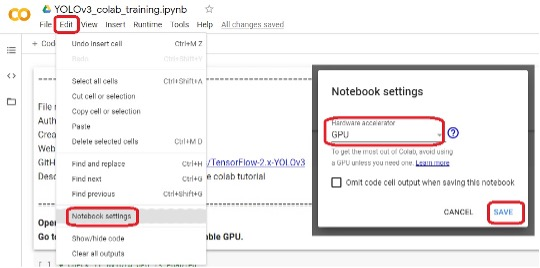


In [ ]:
! nvidia-smi
! /usr/local/cuda/bin/nvcc --version

##Schritt 2: Klonen des Repository für die Personenerkennung
Mit der folgenden Zelle wird das Personenerkennung-Repository von github geklont, um den Rest des Tutorials zu ermöglichen und den Code zu übernehmen.


In [ ]:
# Repository für die Personenerkennung klonen
!git clone https://github.com/ali-tazarghi/Personerkennung

In [ ]:
# Schritt in den Personenerkennung Ordner
%cd Personerkennung/

## Schritt 3: Abhängigkeiten installieren
Google Colab sollte alle notwendigen Abhängigkeiten bereits in Ihrem Notebook installiert haben. Dieser Abschnitt dient als Backup-Plan, falls aus irgendeinem Grund bei der Ausführung von DeepSort Probleme mit den Abhängigkeiten auftreten sollten.

In [ ]:
#Abhängigkeiten installieren
!pip install -r requirements-gpu.txt

##Schritt 4: Herunterladen der offiziellen YOLOv4 Pre-trained Weights

Unser Person-Tracker verwendet YOLOv4 für die Personerkennung, die Deep Sort dann zum Tracking verwendet. Es gibt ein offizielles vortrainiertes YOLOv4-Objektdetektormodell. Für einfache Demozwecke werden wir die vortrainierten Gewichte für unseren Tracker verwenden.

In [ ]:
# yolov4-Modellgewichte in den Ordner data herunterladen
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights -P data/

In [ ]:
!sudo apt-get install --no-install-recommends \
    cuda-10-1 \
    libcudnn7=7.6.4.38-1+cuda10.1  \
    libcudnn7-dev=7.6.4.38-1+cuda10.1

##Schritt 5: YOLOv4 Darknet-Gewichte in TensorFlow-Modell umwandeln
Um die Personenerkennung durchzuführen, werden wir TensorFlow verwenden. Um dies zu erreichen, müssen zuerst die yolov4-Gewichte in ein TensorFlow-Modell umgewandelt werden.


In [ ]:
# Darknet-Gewichte in Tensorflow-Modell umwandeln
! python convert_model.py --model yolov4

##Schritt 6: Personenerkennung mit YOLOv4 durchführen
Google Colab unterstützt nicht die Anzeige von Videos, während diese verarbeitet werden. Daher wird die Ausgabe der Personenerkennung unterdrückt, während er läuft, und das gesamte Video wird angezeigt, sobald die Verarbeitung abgeschlossen ist.


In [ ]:
# Personenerkennung  ausführen 
!python main.py --video ./data/video/test.mp4 --output ./outputs/tracker.avi --model yolov4 --dont_show --info

In [ ]:
# Hilfsfunktion zur Anzeige von Videos definieren
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # resultierendes Deepsort-Video anzeigen
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# Konvertieren des resultierenden Videos vom avi in das mp4-Dateiformat
import os
path_video = os.path.join("outputs","test.avi")
%cd outputs/
!ffmpeg -y -loglevel panic -i test.avi output.mp4
%cd ..

# Ausgang Personenerkennung Video
path_output = os.path.join("outputs","output.mp4")
show_video(path_output, width=960)

So greifen in Google Drive auf Ordner und Dateien zu.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Kopieren des Videos auf Google Drive | Herunterladen des Videos vom Dateibrowser (optional)

In [ ]:
%mkdir '../drive/My Drive/Colab Notebooks/Personenerkennung'
%cp -r outputs/output.mp4 '../drive/My Drive/Colab Notebooks/Personenerkennung/'
%ls '../drive/My Drive/Colab Notebooks/Personenerkennung/'
